# Question 1

### Read data and data pre-processing

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df = pd.read_csv('techSalaries2017.csv')

# first, drop any non-numerical column
df = df.drop(['company','title','location','basesalary','bonus','stockgrantvalue','Race','Education','gender'],axis = 1)

#filter out missing value on education and race
edu_dummies = ['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College']
race_dummies = ['Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic']
df_filter = df[(df[edu_dummies].sum(axis = 1) > 0)&(df[race_dummies].sum(axis = 1)>0)]

# to avoid dummy variable trap
df_filter = df_filter.drop(['Some_College','Race_Hispanic'],axis = 1)

# extract dependent and independent variable
y = df_filter['totalyearlycompensation']
X = df_filter.drop(columns = [df_filter.columns[0]])

In [2]:

# standardize input before fit into model. so the abs value of 
# coefficients -> how important a variable is

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=X.columns, index=X.index)
X_standard = sm.add_constant(X_standard)

X_train, X_test, y_train, y_test = train_test_split(
     X_standard, y, train_size= 0.85, random_state=113
 ) 

model = sm.OLS(y_train,X_train).fit()
model.summary()
# Therefore, year of experience is the most important feature.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     totalyearlycompensation   R-squared:                       0.265
Model:                                 OLS   Adj. R-squared:                  0.264
Method:                      Least Squares   F-statistic:                     442.4
Date:                     Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                             23:23:05   Log-Likelihood:            -2.4101e+05
No. Observations:                    18428   AIC:                         4.821e+05
Df Residuals:                        18412   BIC:                         4.822e+05
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.981e+05    853.549    232.076      0.000    1.96e+05       2e+05
yearsofexperience  5.192e+04   1244.930     41.703      0.000    4.95e+04    5.44e+04
yearsatcompany    -7263.5350   1018.017     -7.135      0.000   -9258.942   -5268.128
Masters_Degree     1.532e+04   3466.847      4.420      0.000    8528.158    2.21e+04
Bachelors_Degree   4016.5244   3483.912      1.153      0.249   -2812.266    1.08e+04
Doctorate_Degree   2.063e+04   1625.025     12.694      0.000    1.74e+04    2.38e+04
Highschool         -808.3342   1162.995     -0.695      0.487   -3087.912    1471.244
Race_Asian          486.0937   2042.456      0.238      0.812   -3517.310    4489.498
Race_White         2701.4907   1983.076      1.362      0.173   -1185.523    6588.505
Race_Two_Or_More   3398.1097   1109.855      3.062      0.002    1222.691    5573.529
Race_Black         -664.8197   1081.783     -0.615      0.539   -2785.215    1455.576
Age                -390.5370   1097.741     -0.356      0.722   -2542.210    1761.136
Height             -627.6788    854.214     -0.735      0.462   -2302.019    1046.661
Zodiac             1580.3095    855.763      1.847      0.065     -97.065    3257.684
SAT                3.385e+04   2093.843     16.164      0.000    2.97e+04    3.79e+04
GPA                3231.4785   2088.018      1.548      0.122    -861.230    7324.187
==============================================================================
Omnibus:                    25571.911   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         41055303.479
Skew:                           7.403   Prob(JB):                         0.00
Kurtosis:                     233.759   Cond. No.                         9.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
X_train.shape

(18428, 16)

### See model's performance on both training set and test set

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate MSE and R^2 for the training set
mse_train = mean_squared_error(y_train, y_train_pred,squared = False )
r2_train = r2_score(y_train, y_train_pred)
print("Training Set RMSE:", mse_train)
print("Training Set R_Sqaure:", r2_train)
print(' ')                   
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate MSE and R^2 for the test set
mse_test = mean_squared_error(y_test, y_test_pred, squared = False)
r2_test = r2_score(y_test, y_test_pred)
print("Test Set RMSE:", mse_test)
print("Test Set R_Sqaure:", r2_test)

Training Set RMSE: 115806.1283324288
Training Set R_Sqaure: 0.26491136996063513
 
Test Set RMSE: 103198.66065539584
Test Set R_Sqaure: 0.27523431671933585


In [5]:
y_train.shape

(18428,)

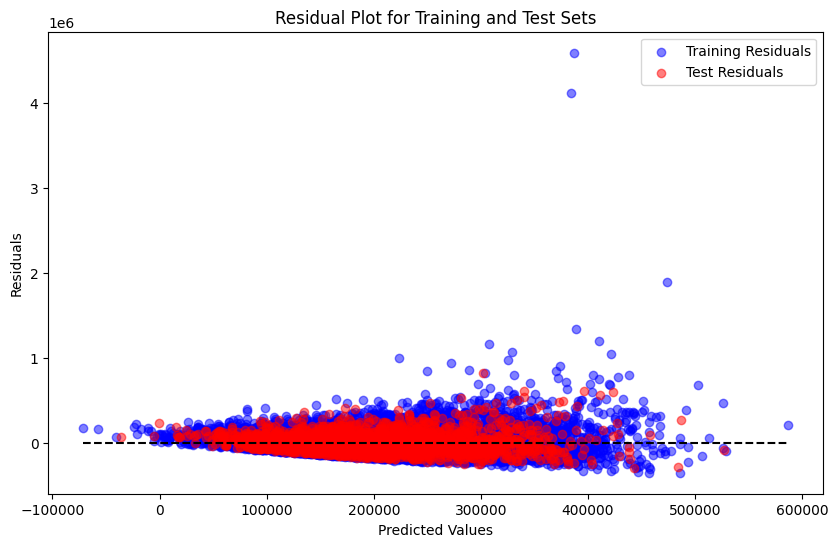

In [6]:
import matplotlib.pyplot as plt
import numpy as np
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plotting
plt.figure(figsize=(10, 6))

# Training set residuals
plt.scatter(y_train_pred, residuals_train, color="blue", label="Training Residuals", alpha=0.5)

# Test set residuals
plt.scatter(y_test_pred, residuals_test, color="red", label="Test Residuals", alpha=0.5)

plt.hlines(y=0, xmin=np.min(y_train_pred), xmax=np.max(y_train_pred), colors="black", linestyles="dashed")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Training and Test Sets")
plt.legend()
plt.show()

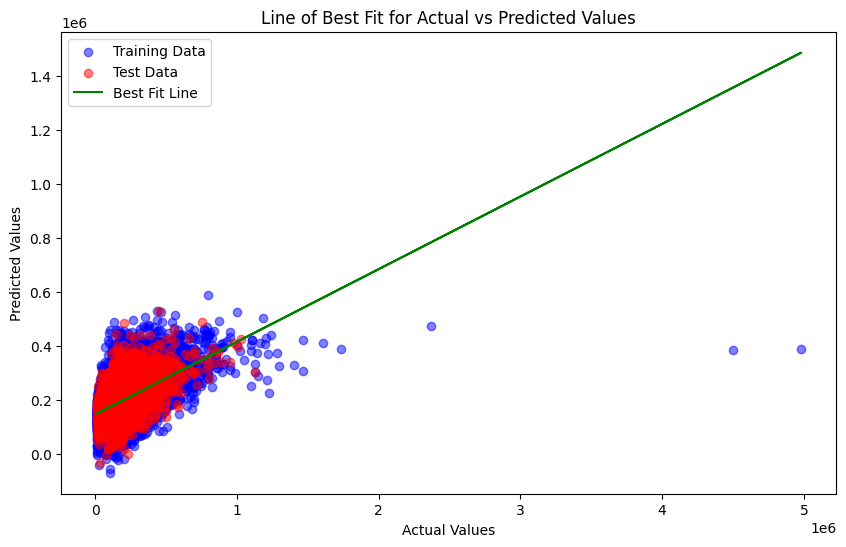

In [7]:
combined_actual = np.concatenate((y_train, y_test))
combined_predicted = np.concatenate((y_train_pred, y_test_pred))

# Calculate the line of best fit
coef = np.polyfit(combined_actual, combined_predicted, 1)
poly1d_fn = np.poly1d(coef)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_train, y_train_pred, color="blue", label="Training Data", alpha=0.5)
plt.scatter(y_test, y_test_pred, color="red", label="Test Data", alpha=0.5)

# Line of best fit
plt.plot(combined_actual, poly1d_fn(combined_actual), color="green", label="Best Fit Line")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Line of Best Fit for Actual vs Predicted Values")
plt.legend()
plt.show()

In [8]:
X_standard

,const,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Age,Height,Zodiac,SAT,GPA
15710,1.0,-0.363275,0.691199,-0.854026,-1.012112,4.728969,-0.118853,0.942912,-0.741974,-0.191892,-0.178021,0.845973,0.630664,0.730930,0.798699,0.492881
23532,1.0,-0.705434,-0.211221,-0.854026,0.988033,-0.211463,-0.118853,-1.060545,-0.741974,5.211252,-0.178021,-1.419600,-1.845127,1.600610,0.875342,0.600650
23533,1.0,-0.192195,0.992005,-0.854026,0.988033,-0.211463,-0.118853,0.942912,-0.741974,-0.191892,-0.178021,-1.311716,-0.513187,-1.588215,1.667330,1.570574
23534,1.0,-0.534354,0.390392,1.170924,-1.012112,-0.211463,-0.118853,0.942912,-0.741974,-0.191892,-0.178021,-0.556525,2.254559,0.441037,-0.018837,-0.548889
23535,1.0,-0.363275,-0.812834,-0.854026,0.988033,-0.211463,-0.118853,-1.060545,1.347756,-0.191892,-0.178021,-0.880178,0.570409,-1.298322,0.977534,1.175420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,1.0,0.321043,1.292812,-0.854026,0.988033,-0.211463,-0.118853,0.942912,-0.741974,-0.191892,-0.178021,-0.664409,0.467875,1.600610,3.098017,3.115267
61982,1.0,2.202918,3.398457,1.170924,-1.012112,-0.211463,-0.118853,0.942912,-0.741974,-0.191892,-0.178021,2.140587,0.731866,-0.138749,2.476349,2.145343
61984,1.0,1.518600,-0.211221,1.170924,-1.012112,-0.211463,-0.118853,-1.060545,1.347756,-0.191892,-0.178021,1.924818,-0.031478,1.310716,3.191693,3.115267
61987,1.0,2.545077,-0.211221,1.170924,-1.012112,-0.211463,-0.118853,-1.060545,-0.741974,-0.191892,5.617300,1.385395,-1.433327,0.441037,3.753748,3.402651


In [9]:
from sklearn.linear_model import LinearRegression

# do a single linear regression for yearsofexperience
X_single = X_standard[['yearsofexperience']]
lm = LinearRegression()


X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(
     X_single, y, train_size= 0.85, random_state=113,shuffle = True
 )

lm.fit(X_single_train,y_single_train)
r_square = lm.score(X_single_test,y_single_test)
print('r^2 of variable year of experience on test set is:', r_square)

r^2 of variable year of experience on test set is: 0.16939707328977893


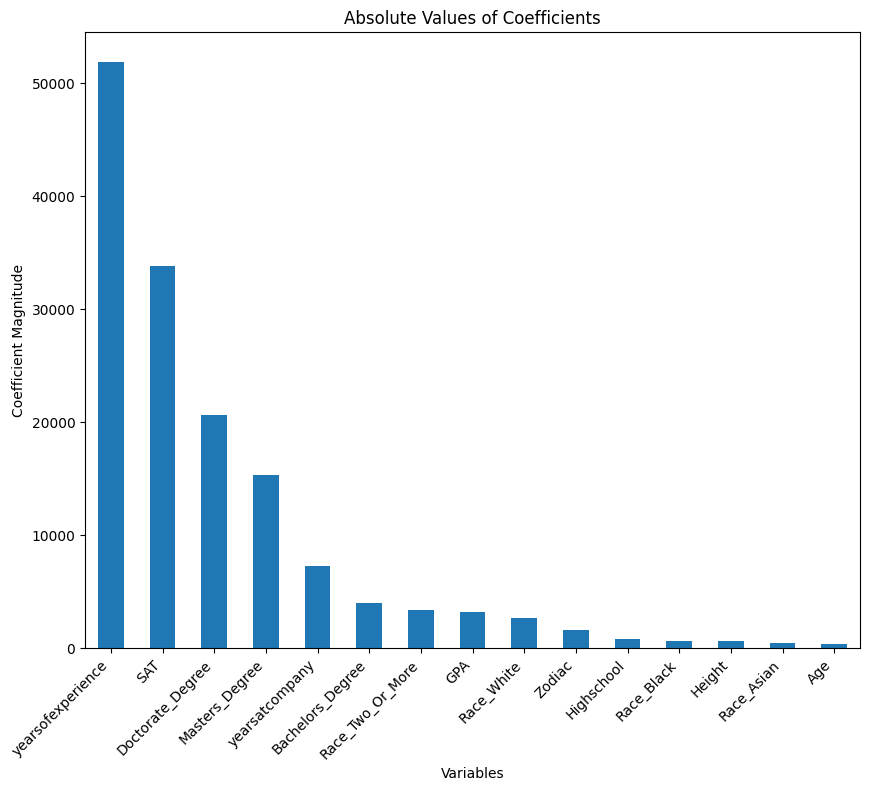

In [10]:
import matplotlib.pyplot as plt

# Accessing coefficients
coefficients = model.params

# Dropping the constant if it exists
if 'const' in coefficients:
    coefficients = coefficients.drop('const')

# Taking absolute values of coefficients for comparison
coefficients_abs = coefficients.abs()

# Sorting coefficients by their absolute values
coefficients_abs_sorted = coefficients_abs.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
coefficients_abs_sorted.plot(kind='bar')
plt.title('Absolute Values of Coefficients')
plt.xlabel('Variables')
plt.xticks(rotation = 45, ha = "right" )
plt.ylabel('Coefficient Magnitude')
plt.show()


# Question 2

In [11]:
from sklearn.linear_model import Ridge,RidgeCV
import numpy as np
                        
lambdas = np.linspace(1,200,200)
ridge_cv = RidgeCV(alphas = lambdas,cv =5)
ridge_cv.fit(X_train,y_train)

optimal_lambda = ridge_cv.alpha_
print('Optimal lambda:', optimal_lambda)

Optimal lambda: 35.0


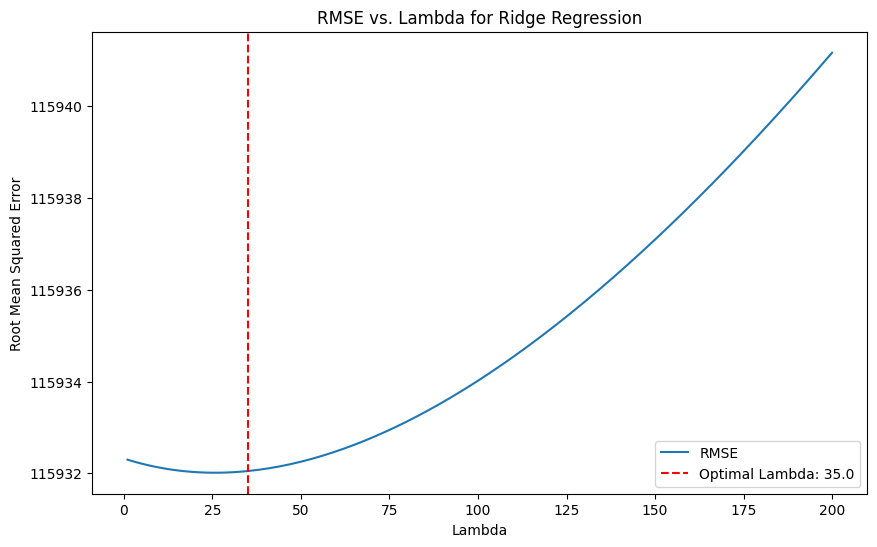

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Assuming you have already split your data into X_train, y_train

# Define the range of lambdas
lambdas = np.linspace(1, 200, 200)
# Prepare to store the RMSE for each lambda
rmse_values = []

# Perform 5-fold cross-validation for each lambda
for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    mse = -cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(mse.mean())
    rmse_values.append(rmse)

# Plot the RMSE values
plt.figure(figsize=(10, 6))
plt.plot(lambdas, rmse_values, label='RMSE')
plt.axvline(x=optimal_lambda, color='r', linestyle='--', label=f'Optimal Lambda: {optimal_lambda}')

# Create a scalar formatter
y_formatter = ScalarFormatter(useOffset=False)
plt.gca().yaxis.set_major_formatter(y_formatter)

plt.xlabel('Lambda')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Lambda for Ridge Regression')
plt.legend()
plt.show()


In [13]:
from sklearn.linear_model import Ridge
import numpy as np
rm = Ridge(alpha = 35, fit_intercept=False)
rm.fit(X_train,y_train)
y_pred = rm.predict(X_test)

# Calculate the R^2 score on the test set
r2_score_test = rm.score(X_test, y_test)

# Calculate the Mean Squared Error on the test set
mse_test = mean_squared_error(y_test, y_pred)
mse_test = np.sqrt(mse_test)
print("R^2 on test set after applying L2 normalization:", r2_score_test)
print("RMSE on test set after applying L2 normalization:", mse_test)
print('')
print("Coefficients:", rm.coef_) # ignore the first number since it is constant we mannually added

R^2 on test set after applying L2 normalization: 0.27535440254232213
RMSE on test set after applying L2 normalization: 103190.11085112242

Coefficients: [197712.44262941  51693.92501088  -7166.77565745  14510.682549
   3193.6279477   20261.85125189   -989.45629611    462.03974931
   2664.39107239   3374.14018241   -681.58602987   -284.35010835
   -628.50189911   1576.64169644  33526.11815762   3531.69874141]


# Question 3 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     X_standard, y, train_size= 0.85, random_state = 113,shuffle = True
) 


# Setting up the range of alphas (lambdas) to test
lambdas = np.linspace(1, 300, 300)

In [15]:
X_train.shape

(18428, 16)

In [16]:
from sklearn.linear_model import LassoCV,Lasso

lasso_cv = LassoCV(alphas = lambdas, cv = 5,random_state = 113)
lasso_cv.fit(X_train,y_train)#(X_standard,y)
optimal_lambda = lasso_cv.alpha_

print("Optimal lambda:", optimal_lambda)

Optimal lambda: 201.0


In [17]:
lasso = Lasso(alpha = 201, fit_intercept=False, random_state= 113)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

# Calculate the R^2 score on the test set
r2_score_test = lasso.score(X_test, y_test)

# Calculate the Mean Squared Error on the test set
mse_test = mean_squared_error(y_test, y_pred)
mse_test = np.sqrt(mse_test)
print("R^2 on test set after applying L1 normalization:", r2_score_test)
print("RMSE on test set after applying L1 normalization:", mse_test)
print('')
print("Coefficients:", lasso.coef_)

R^2 on test set after applying L1 normalization: 0.275859537437409
RMSE on test set after applying L1 normalization: 103154.13877528223

Coefficients: [197888.96782911  51207.2123828   -6783.99527829  11230.67605723
      0.          18818.23856882  -1521.46663866     -0.
   1939.97701122   2962.873084     -697.59331529     -0.
   -427.04608281   1376.89053469  33866.05043539   3058.3214133 ]


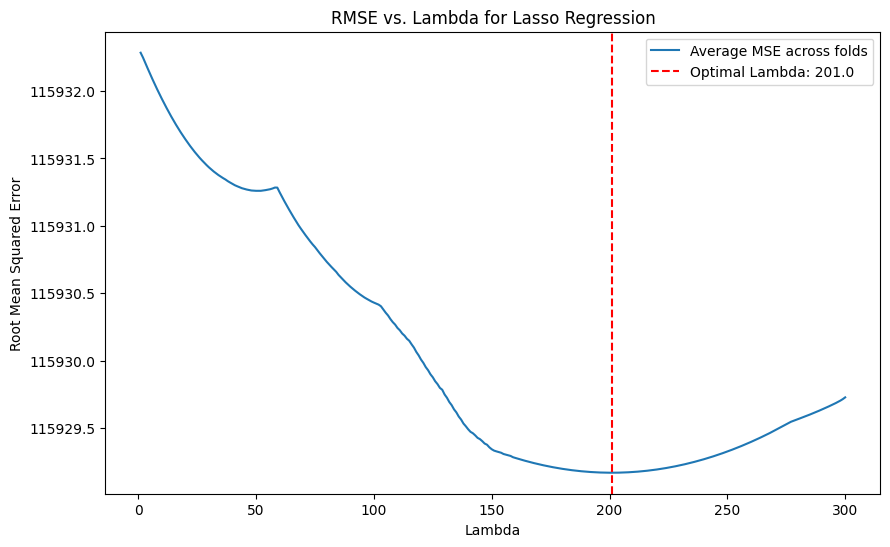

In [18]:
mse_means = lasso_cv.mse_path_.mean(axis=1)
mse_means =np.sqrt(mse_means)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, mse_means, label='Average MSE across folds')

# Highlight the optimal alpha value in the plot
plt.axvline(x=lasso_cv.alpha_, color='r', linestyle='--', label=f'Optimal Lambda: {lasso_cv.alpha_}')

# Optional: Use a scalar formatter to avoid scientific notation on axes
y_formatter = ScalarFormatter(useOffset = False)
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.xlabel('Lambda')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Lambda for Lasso Regression')
plt.legend()
plt.show()

# Question 4

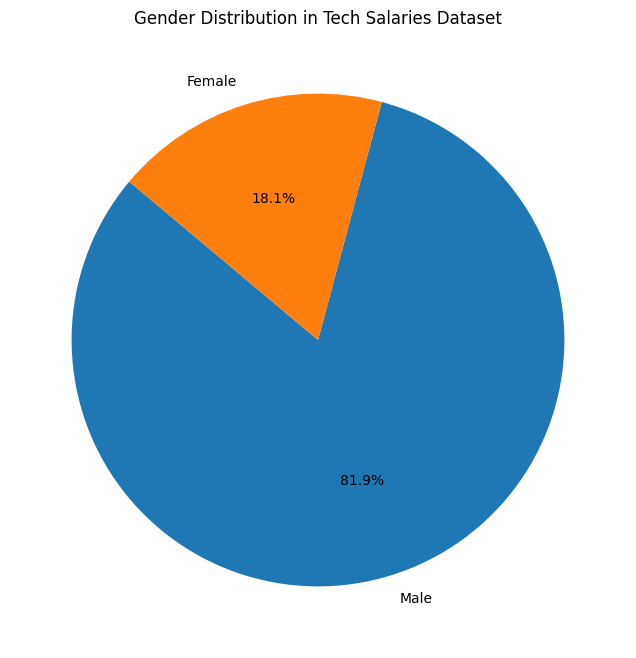

,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Age,Height,Zodiac,SAT,GPA
15710,400000,5.0,5.0,1,0,0,1,0,1,0,0,0,45,68.891,9,1166,3.04
23532,136000,3.0,2.0,1,0,1,0,0,0,0,1,0,24,61.454,12,1175,3.07
23533,337000,6.0,6.0,1,0,1,0,0,1,0,0,0,25,65.455,1,1268,3.34
23534,222000,4.0,4.0,1,1,0,0,0,1,0,0,0,32,73.769,8,1070,2.75
23535,187000,5.0,0.0,1,0,1,0,0,0,1,0,0,29,68.710,2,1187,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,1470000,9.0,7.0,1,0,1,0,0,1,0,0,0,31,68.402,12,1436,3.77
61982,4500000,20.0,14.0,1,1,0,0,0,1,0,0,0,57,69.195,6,1363,3.50
61984,1605000,16.0,2.0,0,1,0,0,0,0,1,0,0,55,66.902,11,1447,3.77
61987,2372000,22.0,2.0,1,1,0,0,0,0,0,0,1,50,62.691,8,1513,3.85


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('techSalaries2017.csv')

# first, drop any non-numerical column
df = df.drop(['company','title','location','basesalary','bonus','stockgrantvalue','Race','Education'],axis = 1)
df = df[df['gender'].isin(['Male', 'Female'])]
# Encode 'Male' as 1 and 'Female' as 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

#filter out missing value on education and race
edu_dummies = ['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College']
race_dummies = ['Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic']
df_filter = df[(df[edu_dummies].sum(axis = 1) > 0)&(df[race_dummies].sum(axis = 1)>0)]

# to avoid dummy variable trap
df_filter = df_filter.drop(['Some_College','Race_Hispanic'],axis = 1)

gender_counts = df_filter['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution in Tech Salaries Dataset')
plt.show()

df_filter

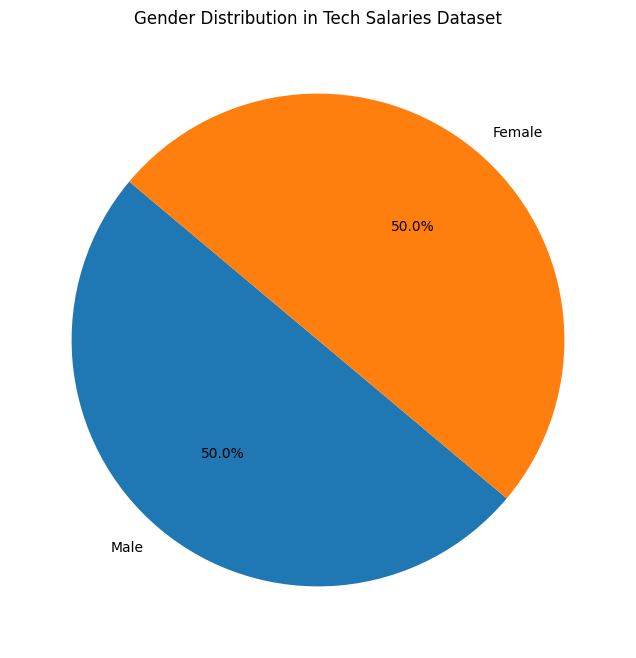

In [20]:
from sklearn.metrics import classification_report, accuracy_score

# Balance the dataset by undersampling the majority class
min_class_size = min(df_filter['gender'].value_counts())
df_male = df_filter[df_filter['gender'] == 1].sample(n=min_class_size, random_state=113)
df_female = df_filter[df_filter['gender'] == 0].sample(n=min_class_size, random_state=113)
df_balanced = pd.concat([df_male, df_female])

# Prepare the dataset for logistic regression
X = df_balanced.drop('gender', axis=1)  # Predictor variables
y = df_balanced['gender']  # Outcome variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=113)

gender_counts = df_balanced['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution in Tech Salaries Dataset')
plt.show()

In [21]:
X_train.iloc[:,[0]]

,totalyearlycompensation
51652,123000
57342,59000
36433,265000
25262,279000
28263,76000
...,...
55189,85000
57148,185000
57909,224000
40351,134000


In [24]:
from sklearn.linear_model import LogisticRegression
single_log = LogisticRegression().fit(X_train.iloc[:,[0]],y_train) # compensation and gender only
multiple_log = LogisticRegression().fit(X_train,y_train) # every feature i might use

# Evaluate the models
y_pred_single = single_log.predict(X_test.iloc[:,[0]]) # Again, replace with total annual compensation column index
y_pred_multiple = multiple_log.predict(X_test)

print("Simple Model Evaluation")
print(classification_report(y_test, y_pred_single))
print("Accuracy:", accuracy_score(y_test, y_pred_single))

print("\nFull Model Evaluation")
print(classification_report(y_test, y_pred_multiple))
print("Accuracy:", accuracy_score(y_test, y_pred_multiple))

print('Beta value of single log:', single_log.coef_)
print('Beta value of multiple log:', multiple_log.coef_)

Simple Model Evaluation
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       770
           1       0.50      1.00      0.67       782

    accuracy                           0.50      1552
   macro avg       0.25      0.50      0.34      1552
weighted avg       0.25      0.50      0.34      1552

Accuracy: 0.5038659793814433

Full Model Evaluation
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       770
           1       0.53      0.46      0.49       782

    accuracy                           0.53      1552
   macro avg       0.53      0.53      0.52      1552
weighted avg       0.53      0.53      0.52      1552

Accuracy: 0.5251288659793815
Beta value of single log: [[2.44797905e-07]]
Beta value of multiple log: [[ 7.73262995e-07  7.12104582e-03  3.61640931e-03 -4.09541336e-04
   6.94591810e-05  1.25248212e-04  1.68308012e-04 -9.65145433e-05
   1.67155082e-04 -7.64224966e-05 -1

/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Question 5

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('techSalaries2017.csv')

columns_to_keep = ['totalyearlycompensation','yearsofexperience', 'Age', 'Height', 'SAT', 'GPA']

# Create a new DataFrame with only the desired columns
df_subset = df[columns_to_keep]

# Drop rows with any missing values in these columns
df = df_subset.dropna()

In [26]:
# Assuming 'df' is your DataFrame and 'totalyearlycompensation' is the salary column
# Calculate the median salary
median_salary = df['totalyearlycompensation'].median()

# Create the binary outcome variable
df['high_earner'] = np.where(df['totalyearlycompensation'] > median_salary, 1, 0)


predictors = ['yearsofexperience', 'Age', 'Height', 'SAT', 'GPA']
X = df[predictors]
y = df['high_earner']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=113)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression().fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# To see the coefficients and interpret them
print("Coefficients:", log_reg.coef_)

Accuracy: 0.6706840130896321
Confusion Matrix:
 [[4493 1732]
 [2394 3910]]
Coefficients: [[ 0.15399637 -0.00603002 -0.06545886  0.00329057 -0.00094975]]


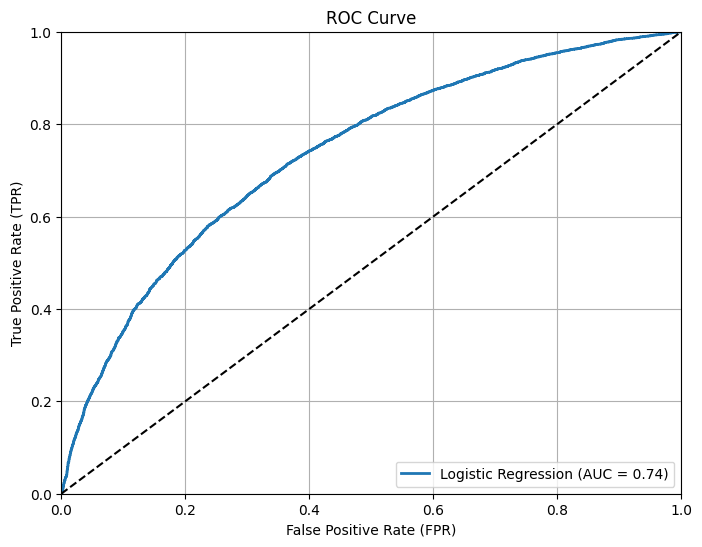

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


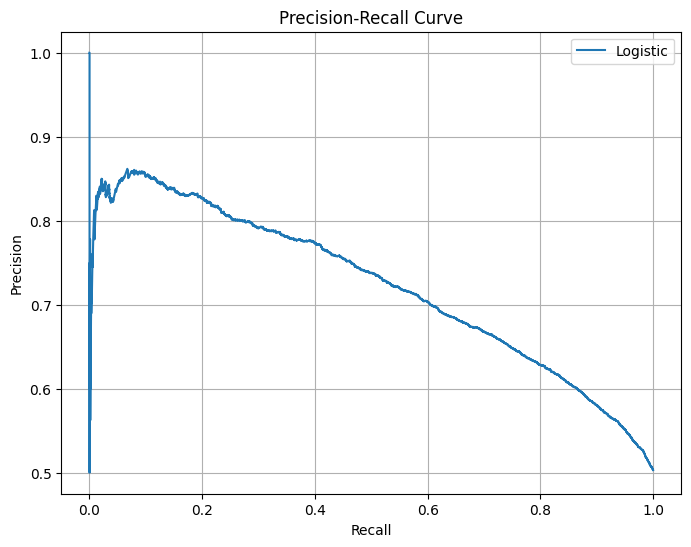

[0.04659303 0.07074587 0.07466584 ... 0.99340408 0.99440639 0.99631586]


In [28]:
# ignore this part of code
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming 'log_reg' is your trained logistic regression model
# and 'X_test' is your test set
y_scores = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# ExtraCredit 1

/Users/alex_z/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex_z/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex_z/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


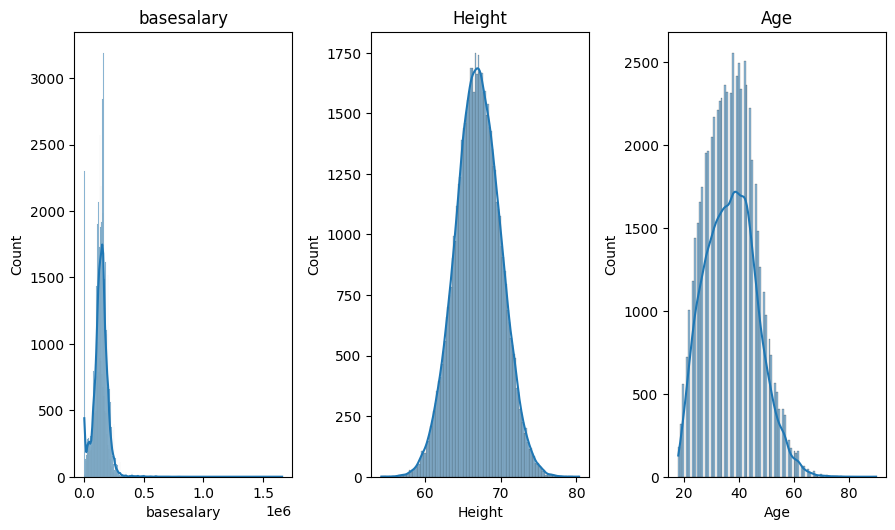

basesalary: Statistics=0.07283506118493516, p=1.9805150711028898e-289
Probably not Gaussian
Height: Statistics=0.003473164116529759, p=0.43554044754899635
Probably Gaussian
Age: Statistics=0.044372702262242214, p=1.2926790059022308e-107
Probably not Gaussian


In [29]:
import seaborn as sns
from scipy.stats import kstest

df = pd.read_csv('techSalaries2017.csv')
features = ['basesalary','Height', 'Age']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 5, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

for feature in features:
    stat, p = kstest(df[feature], 'norm', args=(df[feature].mean(), df[feature].std()))
    print(f'{feature}: Statistics={stat}, p={p}') ## might delete this line, if space is not enough
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian') ## none of those features are normally distributed

# ExtraCredit 2

In [30]:
# try to figure out which company have higher compensation by average 
df = pd.read_csv('techSalaries2017.csv')
columns_to_keep = ['totalyearlycompensation','company']
df_subset = df[columns_to_keep]
df = df_subset.dropna()

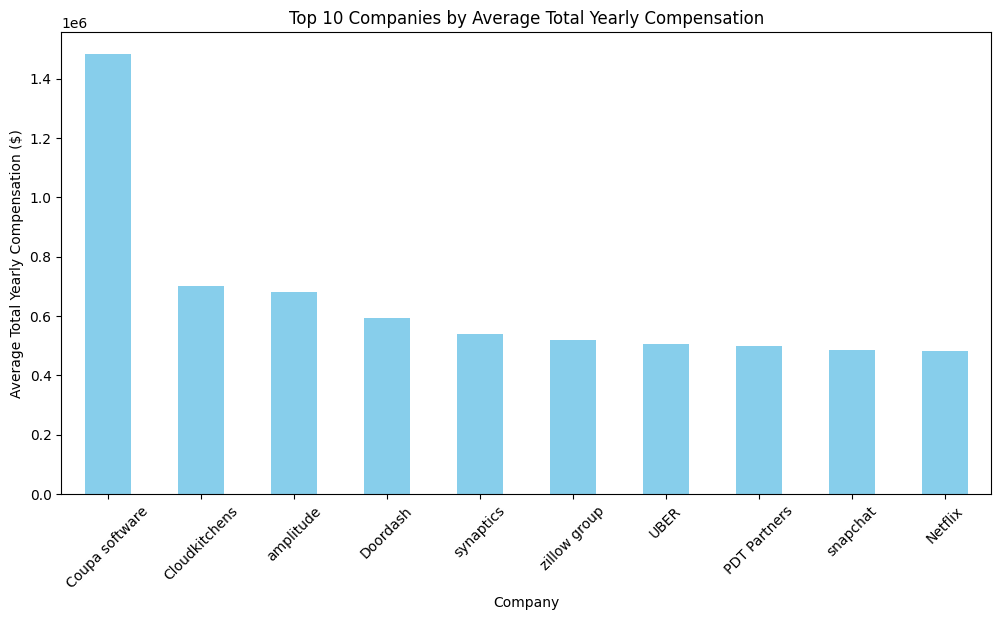

In [31]:
df_clean = df_subset.dropna()

average_compensation = df_clean.groupby('company')['totalyearlycompensation'].mean().sort_values(ascending=False)

# Get the top 10 companies with the highest average compensation
top10_companies = average_compensation.head(10)

# Plot the histogram
plt.figure(figsize=(12, 6))
top10_companies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies by Average Total Yearly Compensation')
plt.xlabel('Company')
plt.ylabel('Average Total Yearly Compensation ($)')
plt.xticks(rotation=45)
plt.show()

# test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X_standard, y, train_size= 0.85, random_state=113,shuffle = True
 ) 


# Setting up the range of alphas (lambdas) to test
lambdas = np.linspace(1, 300, 300)


In [ ]:
from sklearn.linear_model import LassoCV

# Performing Lasso regression with cross-validation to find the optimal lambda
lasso_cv = LassoCV(alphas=lambdas, cv=5, random_state=113)
lasso_cv.fit(X_standard, y)

# Extracting the optimal lambda (alpha) and the model coefficients
optimal_alpha_lasso = lasso_cv.alpha_
lasso_coefficients = pd.Series(lasso_cv.coef_, index=X_standard.columns)

# Counting how many coefficients are exactly zero
num_zero_coefficients = sum(lasso_coefficients == 0)

optimal_alpha_lasso, num_zero_coefficients

In [ ]:
from sklearn.linear_model import LassoCV,Lasso

lasso_cv = LassoCV(alphas = lambdas, cv = 5,random_state = 113)
lasso_cv.fit(X_train,y_train)#(X_standard,y)
optimal_lambda = lasso_cv.alpha_

print("Optimal lambda:", optimal_lambda)

In [ ]:
lasso = Lasso(alpha = 202,fit_intercept=False, random_state= 113)
lasso.fit(X_standard, y)#(X_train,y_train)
y_pred = lasso.predict(X_test)

# Calculate the R^2 score on the test set
r2_score_test = lasso.score(X_test, y_test)

# Calculate the Mean Squared Error on the test set
mse_test = mean_squared_error(y_test, y_pred)
mse_test = np.sqrt(mse_test)
print("R^2 on test set after applying L1 normalization:", r2_score_test)
print("RMSE on test set after applying L1 normalization:", mse_test)
print('')
print("Coefficients:", lasso.coef_)

In [ ]:
lasso = Lasso(alpha = 201,fit_intercept=False, random_state= 113)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

# Calculate the R^2 score on the test set
r2_score_test = lasso.score(X_test, y_test)

# Calculate the Mean Squared Error on the test set
mse_test = mean_squared_error(y_test, y_pred)
mse_test = np.sqrt(mse_test)
print("R^2 on test set after applying L1 normalization:", r2_score_test)
print("RMSE on test set after applying L1 normalization:", mse_test)
print('')
print("Coefficients:", lasso.coef_)

In [ ]:
mse_means = lasso_cv.mse_path_.mean(axis=1)
mse_means =np.sqrt(mse_means)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, mse_means, label='Average MSE across folds')

# Highlight the optimal alpha value in the plot
plt.axvline(x=lasso_cv.alpha_, color='r', linestyle='--', label=f'Optimal Lambda: {lasso_cv.alpha_}')

# Optional: Use a scalar formatter to avoid scientific notation on axes
y_formatter = ScalarFormatter(useOffset=False)
plt.gca().yaxis.set_major_formatter(y_formatter)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_standard.shape, y.shape

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('techSalaries2017.csv')
# first, drop any non-numerical column
df = df.drop(['company','title','location','basesalary','bonus','stockgrantvalue','Race','Education'],axis = 1)
# Filter the dataframe to include only male and female genders
df = df[df['gender'].isin(['Male', 'Female'])]

# Encode 'Male' as 1 and 'Female' as 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Count the number of males and females
gender_counts = df['gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution in Tech Salaries Dataset')
plt.show()

X_single = df[['totalyearlycompensation']]
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=113)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('techSalaries2017.csv')

# Drop non-relevant columns
df = df.drop(['company', 'title', 'location', 'basesalary', 'bonus', 'stockgrantvalue', 'Race', 'Education'], axis=1)

# Filter out rows where gender is not 'Male' or 'Female'
df = df[df['gender'].isin(['Male', 'Female'])]

# Encode 'Male' as 1 and 'Female' as 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Remove rows with NaN values in 'totalyearlycompensation'
df = df.dropna(subset=['totalyearlycompensation'])

# Define the target variable y and the feature X
y = df['gender']
X = df[['totalyearlycompensation']]  # Make sure to select as a DataFrame

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=113)

# Initialize and fit the logistic regression model
lr = LogisticRegression().fit(X_train, y_train)

# Proceed with the rest of the analysis


In [ ]:
X.shape,y.shape

In [ ]:
y

In [ ]:
df = pd.read_csv('techSalaries2017.csv')
df.info()